In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mnist-dataset/train-images.idx3-ubyte
/kaggle/input/mnist-dataset/t10k-labels.idx1-ubyte
/kaggle/input/mnist-dataset/t10k-images.idx3-ubyte
/kaggle/input/mnist-dataset/train-labels.idx1-ubyte
/kaggle/input/mnist-dataset/t10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte
/kaggle/input/mnist-dataset/t10k-images-idx3-ubyte/t10k-images-idx3-ubyte
/kaggle/input/mnist-dataset/train-labels-idx1-ubyte/train-labels-idx1-ubyte
/kaggle/input/mnist-dataset/train-images-idx3-ubyte/train-images-idx3-ubyte


In [2]:
import tensorflow as tf

In [3]:
!pip install functools

  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for functools
  Running setup.py clean for functools
Failed to build functools
ERROR: ERROR: Failed to build installable wheels for some pyproject.toml based projects (functools)


In [4]:
from functools import partial
DefaultConv2D=partial(tf.keras.layers.Conv2D,kernel_size=3,padding="same",activation="relu",kernel_initializer="he_normal")

In [5]:
# model=tf.keras.Sequential([
#     DefaultConv2D(filters=6,kernel_size=3,strides=1,input_shape=(32,32,1)),
#     tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding="same"),
#     DefaultConv2D(filters=16,kernel_size=3,strides=1),
#     tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding="same"),
#     DefaultConv2D(filters=120,kernel_size=3,strides=1),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(units=84,activation='relu',kernel_initializer="he_normal"),
#     tf.keras.layers.Dropout(0.5),
#     tf.keras.layers.Dense(units=10,activation='softmax')
#     ])

In [6]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define a simple CNN architecture
model = models.Sequential([
    layers.Conv2D(filters=6, kernel_size=5, strides=1, padding='valid', activation='relu', input_shape=(32, 32, 1)),
    layers.MaxPooling2D(pool_size=2, strides=2,padding="valid"),
    
    layers.Conv2D(filters=16, kernel_size=5, strides=1, padding='valid', activation='relu'),
    layers.MaxPooling2D(pool_size=2, strides=2,padding="valid"),
    
    layers.Conv2D(filters=120, kernel_size=5, strides=1, padding='valid', activation='relu'),
    
    # Flatten the output from 3D to 1D
    layers.Flatten(),
    
    # Dense layer
    layers.Dense(84, activation='relu'),
    layers.Dropout(0.5),
    # Output layer (10 classes)
    layers.Dense(10, activation='softmax')
])




/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.compile(
    optimizer='adam',                   
    loss='sparse_categorical_crossentropy',    
    metrics=['accuracy']                  
)


In [8]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt


(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()


print("Training Data Shape:", x_train.shape)
print("Test Data Shape:", x_test.shape)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Training Data Shape: (60000, 28, 28)
Test Data Shape: (10000, 28, 28)


In [9]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()


x_train, x_test = x_train / 255.0, x_test / 255.0


x_train = tf.image.resize(x_train[..., np.newaxis], (32, 32))
x_test = tf.image.resize(x_test[..., np.newaxis], (32, 32))


print("New Training Shape:", x_train.shape)  
print("New Test Shape:", x_test.shape)      


New Training Shape: (60000, 32, 32, 1)
New Test Shape: (10000, 32, 32, 1)


In [10]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [11]:
history = model.fit(
    x_train, y_train,
    epochs=15,               
    batch_size=32,          
    validation_data=(x_test, y_test)  
)


Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8223 - loss: 0.5576 - val_accuracy: 0.9826 - val_loss: 0.0595
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9739 - loss: 0.0938 - val_accuracy: 0.9829 - val_loss: 0.0546
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9821 - loss: 0.0629 - val_accuracy: 0.9874 - val_loss: 0.0400
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9865 - loss: 0.0460 - val_accuracy: 0.9890 - val_loss: 0.0349
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9890 - loss: 0.0383 - val_accuracy: 0.9860 - val_loss: 0.0468
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9903 - loss: 0.0342 - val_accuracy: 0.9881 - val_loss: 0.0405
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9925 - loss: 0.0270 - val_accuracy: 0.9879 - val_loss: 0.0410
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9932 - loss: 0.0229 - 

In [12]:
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9886 - loss: 0.0526


[0.044667262583971024, 0.9907000064849854]

In [13]:
len(x_test[5])

32

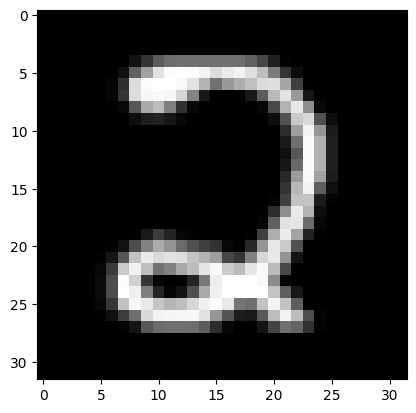

In [14]:
import tensorflow as tf
import matplotlib.pyplot as plt


flat_image = x_test[72]  #

image = flat_image.numpy().reshape(32, 32)

# Display the image
plt.imshow(image, cmap='gray')
plt.show()


In [15]:
y_test[72]

2

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step


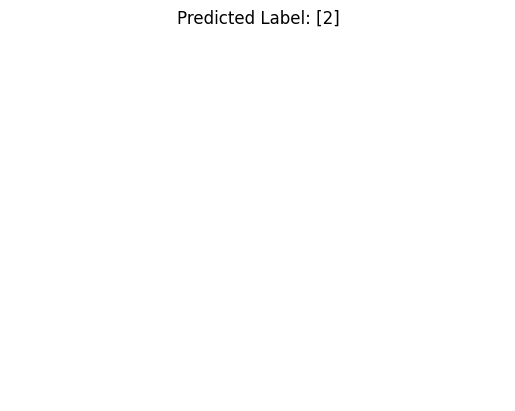

In [16]:
#
import tensorflow as tf
x_test_reshaped = tf.reshape(x_test[72], (1, 32, 32, 1))
prediction = model.predict(x_test_reshaped)


predicted_labels = np.argmax(prediction, axis=1)  
plt.title(f"Predicted Label: {predicted_labels}")
plt.axis('off')
plt.show()


In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 6)           │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 6)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 10, 10, 16)          │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 1, 1, 120)           │          48,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 84)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 185,120 (723.13 KB)

 Trainable params: 61,706 (241.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 123,414 (482.09 KB)

In [32]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report


y_true=y_test
pred=model.predict(x_test)
y_pred = np.argmax(pred, axis=1) 
pred = model.predict(x_test)  # returns probability estimates

y_score = pred


precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


cm = confusion_matrix(y_true, y_pred)
print("\nConfusion Matrix:\n", cm)


try:
    roc_auc = roc_auc_score(y_true, y_score, multi_class='ovr')
    print("\nROC AUC:", roc_auc)
except NameError:
    print("\nNote: Variable 'y_score' not found. Please define it using your model's predict_proba method if you want to compute ROC AUC.")

# Optionally, print a detailed classification report for each class
print("\nClassification Report:\n", classification_report(y_true, y_pred))


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Precision: 0.9907131398947655
Recall: 0.9907
F1 Score: 0.9907005846712633

Confusion Matrix:
 [[ 972    1    0    0    0    0    2    1    3    1]
 [   0 1124    6    2    0    0    0    1    2    0]
 [   1    1 1024    2    1    0    0    2    1    0]
 [   0    0    1 1007    0    2    0    0    0    0]
 [   0    0    0    0  975    0    3    0    0    4]
 [   0    0    1    6    0  881    1    0    0    3]
 [   1    1    1    0    1    4  949    0    1    0]
 [   0    1    3    1    0    0    0 1018    0    5]
 [   2    0    1    2    0    1    0    0  966    2]
 [   0    0    0    1    6    4    1    2    4  991]]

ROC AUC: 0.9999174462535103

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.9